In [1]:
# download dataset
from tensorflow.keras.datasets.mnist import load_data

(xtrain,ytrain),(xtest,ytest)=load_data(path='mnist.npz')

In [2]:
# print data shape
print('---train_data---')
print(xtrain.shape,ytrain.shape)
print(ytrain)
print('---test_data---')
print(xtest.shape,ytest.shape)
print(ytest)

---train_data---
(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
---test_data---
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


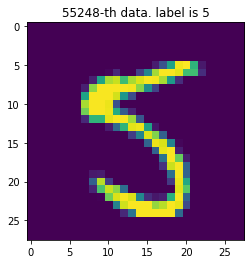

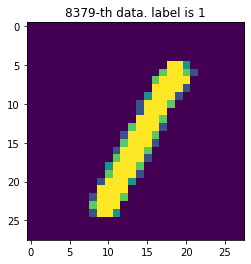

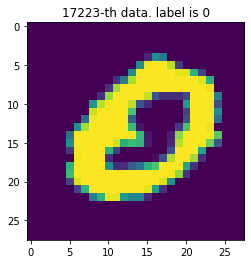

In [3]:
# show data
import numpy as np
import matplotlib.pyplot as plt

sample_size=3
rand_idx=np.random.randint(60000,size=sample_size)

for idx in rand_idx:
    img=xtrain[idx,:]
    label=ytrain[idx]
    plt.figure()
    plt.imshow(img)
    plt.title('%d-th data. label is %d'%(idx,label))

In [4]:
# create validation data
from sklearn.model_selection import train_test_split

xtrain,xval,ytrain,yval=train_test_split(xtrain,ytrain,
                                        test_size=.3)

print(f'trainx{xtrain.shape} trainy{ytrain.shape}')
print(f'valx{xval.shape} valy{yval.shape}')

trainx(42000, 28, 28) trainy(42000,)
valx(18000, 28, 28) valy(18000,)


In [5]:
# data preprocessing
num_xtrain=xtrain.shape[0]
num_xval=xval.shape[0]
num_xtest=xtest.shape[0]
print(num_xtrain,num_xval,num_xtest)

## 28*28 ->784, minmax scale
xtrain=(xtrain.reshape((num_xtrain,28*28)))/255
xval=(xval.reshape((num_xval,28*28)))/255
xtest=(xtest.reshape((num_xtest,28*28)))/255
print(xtrain.shape)

42000 18000 10000
(42000, 784)


In [6]:
# label preprocessing
from tensorflow.keras.utils import to_categorical

ytrain=to_categorical(ytrain)
yval=to_categorical(yval)
ytest=to_categorical(ytest)

print(ytrain)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


In [7]:
# model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model=Sequential()

model.add(Dense(64,activation='relu',input_shape=(784,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
# compile
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['acc'])

In [9]:
# train
history=model.fit(xtrain,ytrain,
                 epochs=30,
                 batch_size=128,
                 validation_data=(xval,yval))

Epoch 1/30
329/329 [==============================] - 3s 5ms/step - loss: 0.5335 - acc: 0.8495 - val_loss: 0.2569 - val_acc: 0.9272
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2039 - acc: 0.9414 - val_loss: 0.1867 - val_acc: 0.9474
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1513 - acc: 0.9549 - val_loss: 0.1544 - val_acc: 0.9557
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1192 - acc: 0.9648 - val_loss: 0.1452 - val_acc: 0.9567
Epoch 5/30
329/329 [==============================] - 1s 5ms/step - loss: 0.1001 - acc: 0.9703 - val_loss: 0.1307 - val_acc: 0.9624
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0849 - acc: 0.9748 - val_loss: 0.1255 - val_acc: 0.9634
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0709 - acc: 0.9794 - val_loss: 0.1292 - val_acc: 0.9638
Epoch 8/30
329/329 [==============================] - 2s 5ms/step - loss: 0.

<Figure size 720x360 with 0 Axes>

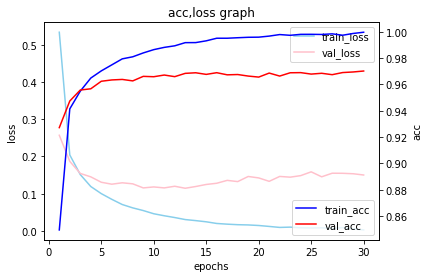

In [10]:
# result visualization
import matplotlib.pyplot as plt

his_dict=history.history

loss=his_dict['loss']
val_loss=his_dict['val_loss']
acc=his_dict['acc']
val_acc=his_dict['val_acc']
epochs=range(1,len(loss)+1)

fig=plt.figure(figsize=(10,5))

fig,ax1=plt.subplots()
ax1.plot(epochs,loss,color='skyblue',label='train_loss')
ax1.plot(epochs,val_loss,color='pink',label='val_loss')
ax1.set_title('acc,loss graph')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()
ax2=ax1.twinx()
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='red',label='val_acc')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [11]:
# evaluation
print(model.evaluate(xtest,ytest))
print('[loss,acc]')

313/313 [==============================] - 1s 3ms/step - loss: 0.1372 - acc: 0.9752
[0.13716687262058258, 0.9751999974250793]
[loss,acc]


(10000, 10)
확률 : 
[3.4847999e-12 1.8323370e-12 9.7308984e-12 7.5108559e-08 6.3532411e-14
 2.4519802e-12 1.8890109e-18 9.9999988e-01 3.0105184e-14 5.3963167e-11]


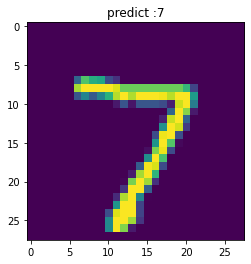

In [12]:
# predict
results=model.predict(xtest)
print(results.shape)
np.set_printoptions(precision=7)
print(f'확률 : \n{results [0]}')

arg_res=np.argmax(results,axis=-1)
plt.imshow(xtest[0].reshape(28,28))
plt.title('predict :'+ str(arg_res[0]))
plt.show()

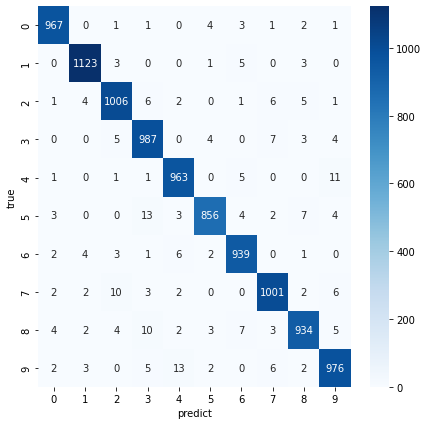

In [13]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

plt.figure(figsize=(7,7))
cm=confusion_matrix(np.argmax(ytest,axis=-1),np.argmax(results,axis=-1))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predict')
plt.ylabel('true')
plt.show()

In [14]:
# classification report
print(classification_report(np.argmax(ytest,axis=-1),
                           np.argmax(results,axis=-1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.98      0.98     10000

